#### Imports

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd

#### Read data

In [2]:
data = pd.read_csv('orders.csv')

#### Show first five rows of data

In [3]:
data.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2016-07-04,2016-08-01,2016-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2016-07-05,2016-08-16,2016-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2016-07-08,2016-08-05,2016-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2016-07-08,2016-08-05,2016-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2016-07-09,2016-08-06,2016-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


#### Plot distribution of freight for South America and `ShipVia` method 3.

<Axes: ylabel='Frequency'>

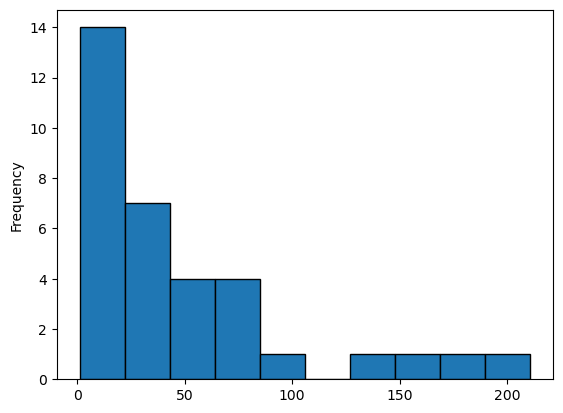

In [4]:
ship_region_mask = (data['ShipRegion'] == 'South America')
ship_via_mask = (data['ShipVia'] == 3)
combined_mask = ship_region_mask & ship_via_mask
freight_data = data.loc[combined_mask, 'Freight']

freight_data.plot(kind='hist', bins=10, edgecolor='k')

#### Goal: We want to construct an automated procedure for plotting the distribution of `ShipVia`usage by `ShipRegion`

In [5]:
plots_directory = pathlib.Path('plots')
plots_directory.mkdir(exist_ok=True)

for ship_region in data['ShipRegion'].unique():
    
    plot_filepath = pathlib.Path(plots_directory, f'{ship_region}.pdf')
    if not plot_filepath.exists():
        region_mask = data['ShipRegion'] == ship_region
        region_data = data[region_mask].copy()
        ship_via_counts = region_data.groupby('ShipVia')['OrderID'].count()

        fig, ax = plt.subplots(1, 1, figsize=(5, 3))

        region_plot = ship_via_counts.plot(
            kind='bar',
            title=f'ShipVia Distribution for {ship_region}',
            edgecolor='k',
            ax=ax,
        )

        plt.savefig(plot_filepath, bbox_inches='tight')
        plt.close()
    else:
        print(f' - Skipping {ship_region}')

 - Skipping Western Europe
 - Skipping South America
 - Skipping Central America
 - Skipping North America
 - Skipping Northern Europe
 - Skipping Scandinavia
 - Skipping Southern Europe
 - Skipping British Isles
 - Skipping Eastern Europe
